# 第一章　概述

作者：[王何宇](http://person.zju.edu.cn/wangheyu)

[浙江大学数学科学学院](http://www.math.zju.edu.cn)

本文档配合讲义第一章的内容。讲义中的代码和图形都可在此验证。

In [1]:
# 这是一个常用的处理向量的数值计算库。
import numpy as np
# 构建奖品种类：羊和车。用了枚举类型。
from enum import Enum
Prize = Enum('Prize', ('car', 'goat'))
# 随机数种子，固定的种子导致固定的伪随机序列。
np.random.seed(250)

## 程序例子：羊还是车？
我们用Python来模拟羊还是车的不同策略结果。

In [5]:
# 现在开始一个新游戏。
def setup_game():
    # 三扇门初始化成都藏了羊。
    doors = [Prize.goat, Prize.goat, Prize.goat]
    # 先随机挑选一扇门，将羊换成车。
    car = np.random.randint(0, 3)
    doors[car] = Prize.car
    # 嘉宾挑选一扇门，然后主持人打开一扇藏有羊的门。
    guest = np.random.randint(0, 3)
    for host in range(0, 3):
        # 既不是藏有车的门，也不是嘉宾挑选的
        if host is not car and host is not guest:
            break
    return doors, guest, host

接下去是激动人心的时刻，嘉宾策略...

In [6]:
# 策略A, 打死也不换。这也是个函数，没毛病。
def strategyA():
    # do nothing.
    return

In [7]:
# 策略B, 换换更健康。
def strategyB(doors, guest, host):
    for door in range(0, 3):
        # 既不是之前挑选的门，也不是主持人打开的
        if door is not guest and door is not host:
            break
    return door

接下去要浪一浪，分别对两种策略各重复这个游戏10000次，别忘了统计结果。

In [8]:
def simulation(total):
    # 嘉宾和主持人的选择，初始为-1。
    win = 0
    for i in range(total):
        doors, guest, host = setup_game()
        strategyA()
        if doors[guest] is Prize.car:
            win = win + 1
    print("win rate of never exchange:", win/total)
    win = 0
    for i in range(total):
        doors, guest,host = setup_game()
        guest = strategyB(doors, guest, host)
        if doors[guest] is Prize.car:
            win = win + 1
    print("win rate of exchange:", win/total)
    return

结果如下。

In [9]:
simulation(10000)

win rate of never exchange: 0.3357
win rate of exchange: 0.671


这是一个很有说服力的结果。这里考虑到部分同学是首次接触Python，所以不论算法还是程序我都采用了比较朴素的做法。可以进一步优化这个算法，但要注意不能丢掉的是随机性。在程序结构上，更好的做法是将游戏改成一个类。这个我们在后续的模拟中会逐步实现。

## 程序例子：求圆面积

接下去这个例子我们用随机投点来计算一个圆的面积。我们不如先画一个圆，顺便可以熟悉一下Python作图。先导入Python的绘图库。

In [10]:
import matplotlib.pyplot as plt

下面这段代码就是讲义中对应插图的来源。一个内接在单位正方形的圆，同时对正方形内做了随机投点。

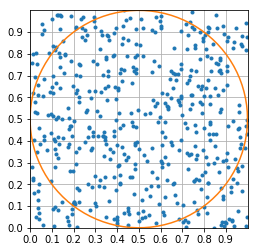

In [11]:
np.random.seed(250)
dots = np.random.rand(2, 500)
#print(dots[:,1])
theta = np.linspace(0, 2 * np.pi, 100)
plt.plot(dots[0, :], dots[1, :], '.', 0.5 + 0.5 * np.cos(theta), 0.5 + 0.5 * np.sin(theta))
axs = plt.gca()
axs.set_aspect('equal', 'box')
plt.axis([0, 1, 0, 1])
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.grid(True)
plt.savefig("circle.pdf")

下面这段程序才是用Monte Carlo法计算圆面积。

In [ ]:
def area_circle(times):
    inside = 0
    dots = np.random.rand(2, times)
    for i in range(times):
        x = dots[0, i] - 0.5
        y = dots[1, i] - 0.5
        if x * x + y * y < 0.25:
            inside += 1
    return inside / times

结果如下：

In [ ]:
area_circle(10000)

由于我们在计算圆面积时根本没有使用圆面积公式，所以我们这里可以利用圆面积来求$\Pi$：

In [ ]:
pi = area_circle(10000) * 4
print(pi)

注意每次求得的$\Pi$值都会有波动。下面连续模拟了100次，每次都是10000个采样。

In [ ]:
for i in range(100):
    pi = area_circle(10000) * 4
    plt.plot(i, pi, 'b.')
plt.plot([0, 99], [np.pi, np.pi], 'r--', label = "$\pi$")
plt.axis([0, 99, np.pi + 0.1, np.pi - 0.1])
plt.legend()
plt.savefig("variation.pdf")

而采样数和精度，或者说波动之间的关系也很明显。在下面的代码中我们变化采样次数，可以看到，随着采样数的增加，模拟得到的$\Pi$值越来越精确，或者说，波动越来越小。

In [ ]:
n = np.logspace(2, 5, 1000)
pi = [area_circle(int(i)) * 4 for i in n]
plt.plot(n, pi, '.')
plt.plot([n[0], n[-1]], [np.pi, np.pi], '--', label = "$\pi$")
plt.xscale('log')
plt.axis([n[0], n[-1], np.pi + 0.3, np.pi - 0.3])
plt.legend()
plt.savefig("number2variation.pdf")